## Utilities
<br>
This notebook has the objective of displaying some of the utilities that have been used
in the project, in particular how the graph representing each sentence is built 
and how it can be visualized. <br> <br>
It is important to note that the dataset that has to be fed to our GNNs 
is an extension of the Dataset class from torch_geometric, here a temporary one is 
created and displayed.

In [5]:
!pip install -e ../TweebankNLP/twitter-stanza
!pip install pythainlp
!sh ../TweebankNLP/download_twitter_resources.sh

Obtaining file:///C:/Users/giova/Desktop/master%27s/NLP/GCNs_on_text/TweebankNLP/twitter-stanza
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: stanza
    Found existing installation: stanza 1.3.0
    Uninstalling stanza-1.3.0:
      Successfully uninstalled stanza-1.3.0
  Running setup.py develop for stanza



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
../TweebankNLP/download_twitter_resources.sh: line 2: wget: command not found
unzip:  cannot find or open glove.twitter.27B.zip, glove.twitter.27B.zip.zip or glove.twitter.27B.zip.ZIP.
rm: cannot remove 'glove.twitter.27B.zip': No such file or directory
C:\Users\giova\miniconda3\python.exe: can't open file 'C:\Users\giova\Desktop\master's\NLP\GCNs_on_text\GCNs_on_text\data\wordvec\English\convert_vectors.py': [Errno 2] No such file or directory
../TweebankNLP/download_twitter_resources.sh: line 11: wget: command not found
unzip:  cannot find or open tweebanknlp_saved_models.zip, tweebanknlp_saved_models.zip.zip or tweebanknlp_saved_models.zip.ZIP.
rm: cannot remove 'tweebanknlp_saved_models.zip': No such file or directory


In [1]:
import utils

2023-09-15 12:50:59 INFO: Downloading default packages for language: en (English)...
2023-09-15 12:51:01 INFO: File exists: C:\Users\giova\stanza_resources\en\default.zip.
2023-09-15 12:51:05 INFO: Finished downloading models and saved to C:\Users\giova\stanza_resources.
2023-09-15 12:51:05 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| ner       | ontonotes |

2023-09-15 12:51:05 INFO: Use device: gpu
2023-09-15 12:51:05 INFO: Loading: tokenize
2023-09-15 12:51:05 INFO: Loading: pos


[['tokenize', 'combined'], ['pos', 'combined'], ['lemma', 'combined'], ['depparse', 'combined'], ['ner', 'ontonotes']]


2023-09-15 12:51:12 INFO: Loading: lemma
2023-09-15 12:51:12 INFO: Loading: depparse
2023-09-15 12:51:13 INFO: Loading: ner
2023-09-15 12:51:14 INFO: Done loading processors!


Utils have been correctly loaded


In [3]:
utils.print_example("""This is an example needed to understand how the dependency parser, 
              from the Stanza library, works. Two separate sentences are parsed.""")

id: 1	head id: 5	dependency relation: nsubj	word: This
id: 2	head id: 5	dependency relation: cop	word: is
id: 3	head id: 5	dependency relation: amod	word: an
id: 4	head id: 5	dependency relation: amod	word: example
id: 5	head id: 0	dependency relation: root	word: needed
id: 6	head id: 7	dependency relation: mark	word: to
id: 7	head id: 5	dependency relation: acl	word: understand
id: 8	head id: 10	dependency relation: advmod	word: how
id: 9	head id: 10	dependency relation: det	word: the
id: 10	head id: 7	dependency relation: obj	word: dependency
id: 11	head id: 5	dependency relation: discourse	word: parser,
id: 1	head id: 5	dependency relation: case	word: from
id: 2	head id: 5	dependency relation: det	word: the
id: 3	head id: 4	dependency relation: compound	word: Stanza
id: 4	head id: 5	dependency relation: compound	word: library,
id: 5	head id: 10	dependency relation: nsubj	word: works.
id: 6	head id: 8	dependency relation: nummod	word: Two
id: 7	head id: 8	dependency relation: compoun

In [4]:
returned_dict = utils.get_tokens_and_dependencies("""My babe don't stand no cheating, 
                                            of course she will believe me. 
                                            Oh yes, she don't stand no cheating""", 
                                            positional_links = True)
print(returned_dict["0 tokens"])
print(returned_dict["0 dependency"])
print(returned_dict["1 tokens"])
print(returned_dict["1 dependency"])

['My' 'babe' "don't" 'stand' 'no' 'cheating,']
[[1 2 3 4 5 6 1 2 2 3 3 4 4 5 5 6]
 [2 0 2 2 6 4 2 1 3 2 4 3 5 4 6 5]]
['of' 'course' 'she' 'will' 'believe' 'me.']
[[ 8  9 10 11 12 13  8  9  9 10 10 11 11 12 12 13]
 [10 10 12 12  7 12  9  8 10  9 11 10 12 11 13 12]]


In [2]:
merged = utils.get_forest_from_sentence("""My babe don't stand no cheating, 
                                            of course she will believe me. 
                                            Oh yes, she don't stand no cheating""")
print(merged)

{'tokens': ['My', 'babe', "don't", 'stand', 'no', 'cheating,', 'of', 'course', 'she', 'will', 'believe', 'me.', 'Oh', 'yes,', 'she', "don't", 'stand', 'no', 'cheating'], 'dependency': array([[ 1,  2,  3,  4,  5,  6,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,
         8,  9, 10, 11, 12, 13,  8,  9,  9, 10, 10, 11, 11, 12, 12, 13,
        15, 16, 17, 18, 19, 20, 21, 15, 16, 16, 17, 17, 18, 18, 19, 19,
        20, 20, 21],
       [ 2,  0,  2,  2,  6,  4,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,
        10, 10, 12, 12,  7, 12,  9,  8, 10,  9, 11, 10, 12, 11, 13, 12,
        14, 17, 15, 15, 15, 19, 19, 16, 15, 17, 16, 18, 17, 19, 18, 20,
        19, 21, 20]]), 'first_nodes': [0, 7, 14]}


In [15]:
#change the embeddings directory and modify the datasetfromsentences class
#to take parameters for the generation of the dataset, as it could be
#created with both sentence node and without it.
sentence = "I love natural language processing"
doc = utils.nlp(sentence)
tokens = []
for sentence in doc.sentences:
    tokens.extend([token.text for token in sentence.tokens])
print(f"tokens: {tokens}")
embeddings = utils.g_utils.embed_to_GloVe(tokens, pca_flag = True)
print("Example of projection through PCA of the embeddings of four words in a 3 dimensional space:")
print(utils.g_utils.project_tokens(["Antonio", "Pasquale", "Luigi", "The"]))
print("Number of elements in the vocabulary of the GloVe utils object:")
print(len(utils.g_utils.vocabulary.keys()))
print("Projections are needed to associate a color to each embedding")

tokens: ['I', 'love', 'natural', 'language', 'processing']
Example of projection through PCA of the embeddings of four words in a 3 dimensional space:
[[0.30797475 0.39720657 0.44447772]
 [0.3200298  0.44480306 0.41386649]
 [0.35748762 0.43441556 0.39780693]
 [0.35826923 0.43894089 0.42264988]]
Number of elements in the vocabulary of the GloVe utils object:
24
Projections are needed to associate a color to each embedding


Processing...


['content/temp//temp.pt']
missing local data in content/temp/, downloading...


3it [00:00,  7.53it/s]
Done!


Graphs representing sentences are stored as:
DataBatch(x=[4, 100], edge_index=[2, 7], y=[1], batch=[4], ptr=[2])
DataBatch(x=[4, 100], edge_index=[2, 7], y=[1], batch=[4], ptr=[2])
The graph representation is visualized as follows:


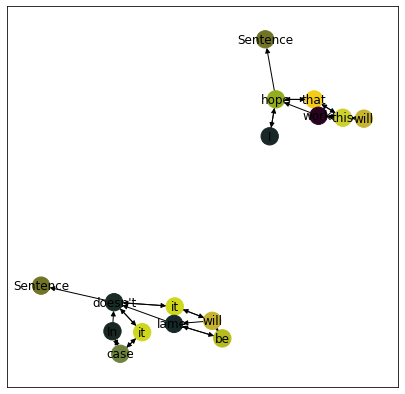

In order to visualize values output of the hidden graph layers, 
we can project the values in the original 3 dimensional space, since we already did PCA.
This visualization is useful to check how the features are smoothed across neighbours:


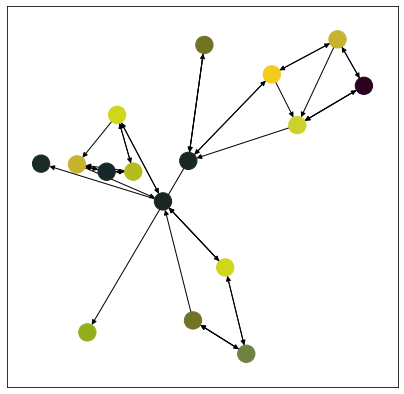

In [36]:
sentences_list = ["I love NLP", "Graphs are neat", "I don't think so"]
target_values = [0, 1, 0]
temp_dataset = utils.Dataset_from_sentences("temp", "content/temp/","content/drive/MyDrive/temp/", 
                                           sentences_list, target_values)

print("Graphs representing sentences are stored as:")
print(temp_dataset[0])
print(temp_dataset[1])
temp_glove_graph, td_dict = temp_dataset.__build_graph_Data_with_GloVe__("""I hope that this will work. 
                                                           In case it doesn't it will be lame.""", 0, True)

print("The graph representation is visualized as follows:")
utils.visualize_graph(temp_glove_graph, td_dict)
x_features = temp_glove_graph.x
links = temp_glove_graph.edge_index
print("""In order to visualize values output of the hidden graph layers, 
we can project the values in the original 3 dimensional space, since we already did PCA.
This visualization is useful to check how the features are smoothed across neighbours:""")
utils.visualize_hidden_graph(x_features, links, k_custom = float(0.6))

In [50]:
temp_dataset = utils.Dataset_from_sentences("temp", "content/temp/","content/drive/MyDrive/temp/", 
                                           sentences_list, target_values)
print(temp_dataset.data_list.x[12, :])

['content/temp//temp.pt']
tensor([-0.0092,  0.0024,  0.0132,  0.0089,  0.0037,  0.0170,  0.0156,  0.0025,
         0.0160, -0.0017, -0.0160, -0.0007, -0.1355, -0.0130,  0.0152, -0.0096,
        -0.0043, -0.0147, -0.0193, -0.0232, -0.0040,  0.0004,  0.0022, -0.0007,
        -0.0031, -0.0199,  0.0031,  0.0042, -0.0023,  0.0061, -0.0031,  0.0095,
         0.0104, -0.0065, -0.0184, -0.0056,  0.0019, -0.0044, -0.0113, -0.0016,
        -0.0665, -0.0095, -0.0046,  0.0113, -0.0148, -0.0076,  0.0027, -0.0006,
        -0.0198, -0.0006, -0.0128,  0.0080, -0.0007, -0.0021,  0.0019,  0.0023,
        -0.0101,  0.0074,  0.0125, -0.0091, -0.0024, -0.0031,  0.0054, -0.0056,
         0.0018, -0.0074, -0.0133, -0.0027, -0.0121,  0.0137,  0.0082,  0.0125,
         0.0078,  0.0026,  0.0100,  0.0066, -0.0168, -0.0027, -0.0034, -0.0056,
         0.0322,  0.0133, -0.0053,  0.0068,  0.0156,  0.0125,  0.0183, -0.0128,
        -0.0089, -0.0110, -0.0064,  0.0040,  0.0014,  0.0063, -0.0024, -0.0033,
        -0.004

In [51]:
temp_dataset = utils.Dataset_from_sentences("temp", "content/temp/","content/drive/MyDrive/temp/", 
                                           sentences_list, target_values)
temp_dataset.normalize_and_save()
print(temp_dataset.data_list.x[12, :])

['content/temp//temp.pt']
tensor([-0.0092,  0.0024,  0.0132,  0.0089,  0.0037,  0.0170,  0.0156,  0.0025,
         0.0160, -0.0017, -0.0160, -0.0007, -0.1355, -0.0130,  0.0152, -0.0096,
        -0.0043, -0.0147, -0.0193, -0.0232, -0.0040,  0.0004,  0.0022, -0.0007,
        -0.0031, -0.0199,  0.0031,  0.0042, -0.0023,  0.0061, -0.0031,  0.0095,
         0.0104, -0.0065, -0.0184, -0.0056,  0.0019, -0.0044, -0.0113, -0.0016,
        -0.0665, -0.0095, -0.0046,  0.0113, -0.0148, -0.0076,  0.0027, -0.0006,
        -0.0198, -0.0006, -0.0128,  0.0080, -0.0007, -0.0021,  0.0019,  0.0023,
        -0.0101,  0.0074,  0.0125, -0.0091, -0.0024, -0.0031,  0.0054, -0.0056,
         0.0018, -0.0074, -0.0133, -0.0027, -0.0121,  0.0137,  0.0082,  0.0125,
         0.0078,  0.0026,  0.0100,  0.0066, -0.0168, -0.0027, -0.0034, -0.0056,
         0.0322,  0.0133, -0.0053,  0.0068,  0.0156,  0.0125,  0.0183, -0.0128,
        -0.0089, -0.0110, -0.0064,  0.0040,  0.0014,  0.0063, -0.0024, -0.0033,
        -0.004